# Required Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2023-04-15 17:57:58.822371: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Download Dataset

In [2]:
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


# Load Dataset

In [3]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


2023-04-15 17:58:00.690535: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Visualize the Data

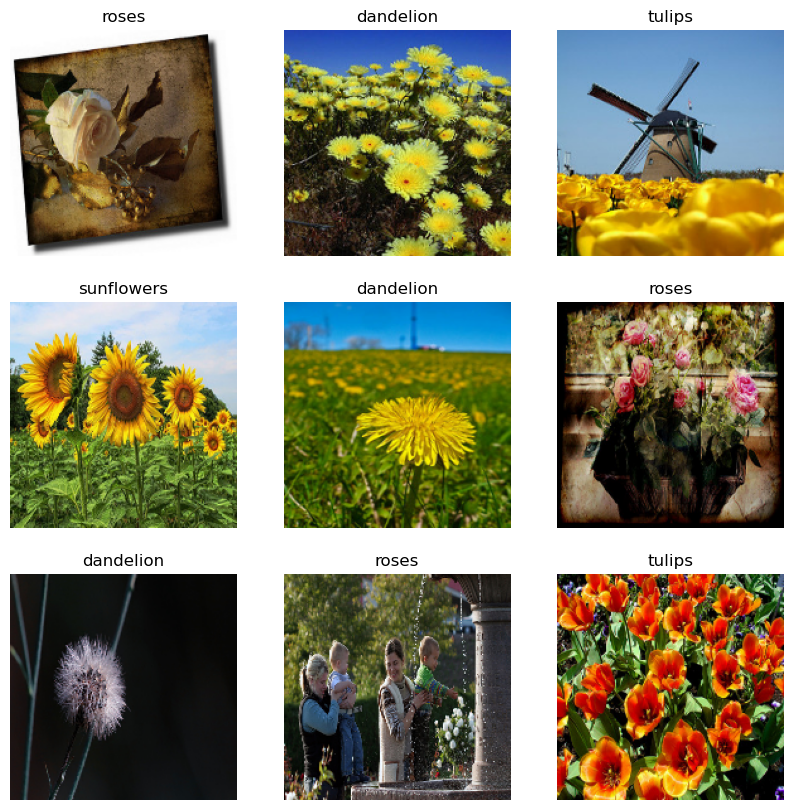

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Pre processing

In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#normalization_layer = layers.Rescaling(1./255)
#normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
#image_batch, labels_batch = next(iter(normalized_ds))
#first_image = image_batch[0]
#print(np.min(first_image), np.max(first_image))

# Creating models

In [6]:
accuracy_dict = {}
loss_dict = {}
num_classes = len(class_names)

# Reference Model

In [7]:
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


fit1 = model.fit(train_ds, validation_data=val_ds, epochs=10, batch_size=32, verbose=0)

acc = fit1.history['accuracy']
val_acc = fit1.history['val_accuracy']

loss = fit1.history['loss']
val_loss = fit1.history['val_loss']

accuracy_dict[model] = (acc,val_acc)
loss_dict[model] = (loss,val_loss)

## Using the mean squared error as a loss function

In [10]:
model1 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model1.compile(optimizer='adam',
              loss=tf.keras.losses.mean_squared_error,
              metrics=['accuracy'])


fit1 = model1.fit(train_ds, validation_data=val_ds, epochs=10, batch_size=32, verbose=0)

acc = fit1.history['accuracy']
val_acc = fit1.history['val_accuracy']

loss = fit1.history['loss']
val_loss = fit1.history['val_loss']

accuracy_dict[model1] = (acc,val_acc)
loss_dict[model1] = (loss,val_loss)

## Using a dropout probability of 40%

In [ ]:
model2 = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])


model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


fit2 = model2.fit(train_ds, validation_data=val_ds, epochs=10, batch_size=32, verbose=0)

acc = fit2.history['accuracy']
val_acc = fit2.history['val_accuracy']

loss = fit2.history['loss']
val_loss = fit2.history['val_loss']

accuracy_dict[model2] = (acc,val_acc)
loss_dict[model2] = (loss,val_loss)

## Using a batch size of 8

In [ ]:
model3 = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])


model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


fit2 = model3.fit(train_ds, validation_data=val_ds, epochs=10, batch_size=8, verbose=0)

acc = fit2.history['accuracy']
val_acc = fit2.history['val_accuracy']

loss = fit2.history['loss']
val_loss = fit2.history['val_loss']

accuracy_dict[model3] = (acc,val_acc)
loss_dict[model3] = (loss,val_loss)

## Using batch normalization

In [ ]:
model4 = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.BatchNormalization(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])


model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


fit2 = model4.fit(train_ds, validation_data=val_ds, epochs=10, batch_size=32, verbose=0)

acc = fit2.history['accuracy']
val_acc = fit2.history['val_accuracy']

loss = fit2.history['loss']
val_loss = fit2.history['val_loss']

accuracy_dict[model4] = (acc,val_acc)
loss_dict[model4] = (loss,val_loss)

# Combine modifications ii, iii and iv

In [ ]:
model5 = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.BatchNormalization(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])


model5.compile(optimizer='adam',
              loss=tf.keras.losses.mean_squared_error,
              metrics=['accuracy'])


fit2 = model5.fit(train_ds, validation_data=val_ds, epochs=10, batch_size=8, verbose=0)

acc = fit2.history['accuracy']
val_acc = fit2.history['val_accuracy']

loss = fit2.history['loss']
val_loss = fit2.history['val_loss']

accuracy_dict[model5] = (acc,val_acc)
loss_dict[model5] = (loss,val_loss)

# Train models

In [ ]:
epochs=10
epochs_range = range(epochs)

keys = zip(accuracy_dict.keys(),loss_dict.keys())

for model in keys:

  acc,val_acc = accuracy_dict[model]
  loss,val_loss = loss_dict[model]

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()